In [3]:
pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 6.3 MB/s eta 0:00:0000:0100:01
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.6 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 8.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.5 MB/s eta 0:00:0000:0100:01m
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m 

In [9]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("Desktop/internship/study/data.csv")

In [4]:
df.columns

Index(['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'SO01', 'SO03',
       'SO04', 'SO05', 'SO06', 'SO07', 'SO09', 'SO10', 'SO13', 'SO14', 'ST01',
       'ST03', 'ST04', 'ST05', 'ST06', 'ST07', 'ST09', 'ST10', 'ST13', 'ST14',
       'TIME001', 'TIME002', 'TIME003', 'TIME004', 'TIME_SUM', 'MAILSENT',
       'LASTDATA', 'FINISHED', 'Q_VIEWER', 'LASTPAGE', 'MAXPAGE', 'MISSING',
       'MISSREL', 'TIME_RSI'],
      dtype='object')

In [5]:
df.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,SO01,SO03,SO04,SO05,...,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI
0,7,NaN,NaN,base,interview,2024-06-17 12:36:04,2,1,4,5,...,4696,NaN,2024-06-17 13:54:20,1,0,4,4,0,0,NaN
1,2,NaN,NaN,base,interview,2024-06-17 17:13:54,4,3,2,2,...,3811,NaN,2024-06-17 18:17:26,1,0,4,4,0,0,NaN
2,16,NaN,NaN,base,interview,2024-06-19 13:55:02,4,5,1,1,...,3128,NaN,2024-06-19 14:47:10,1,0,4,4,0,0,NaN


[]

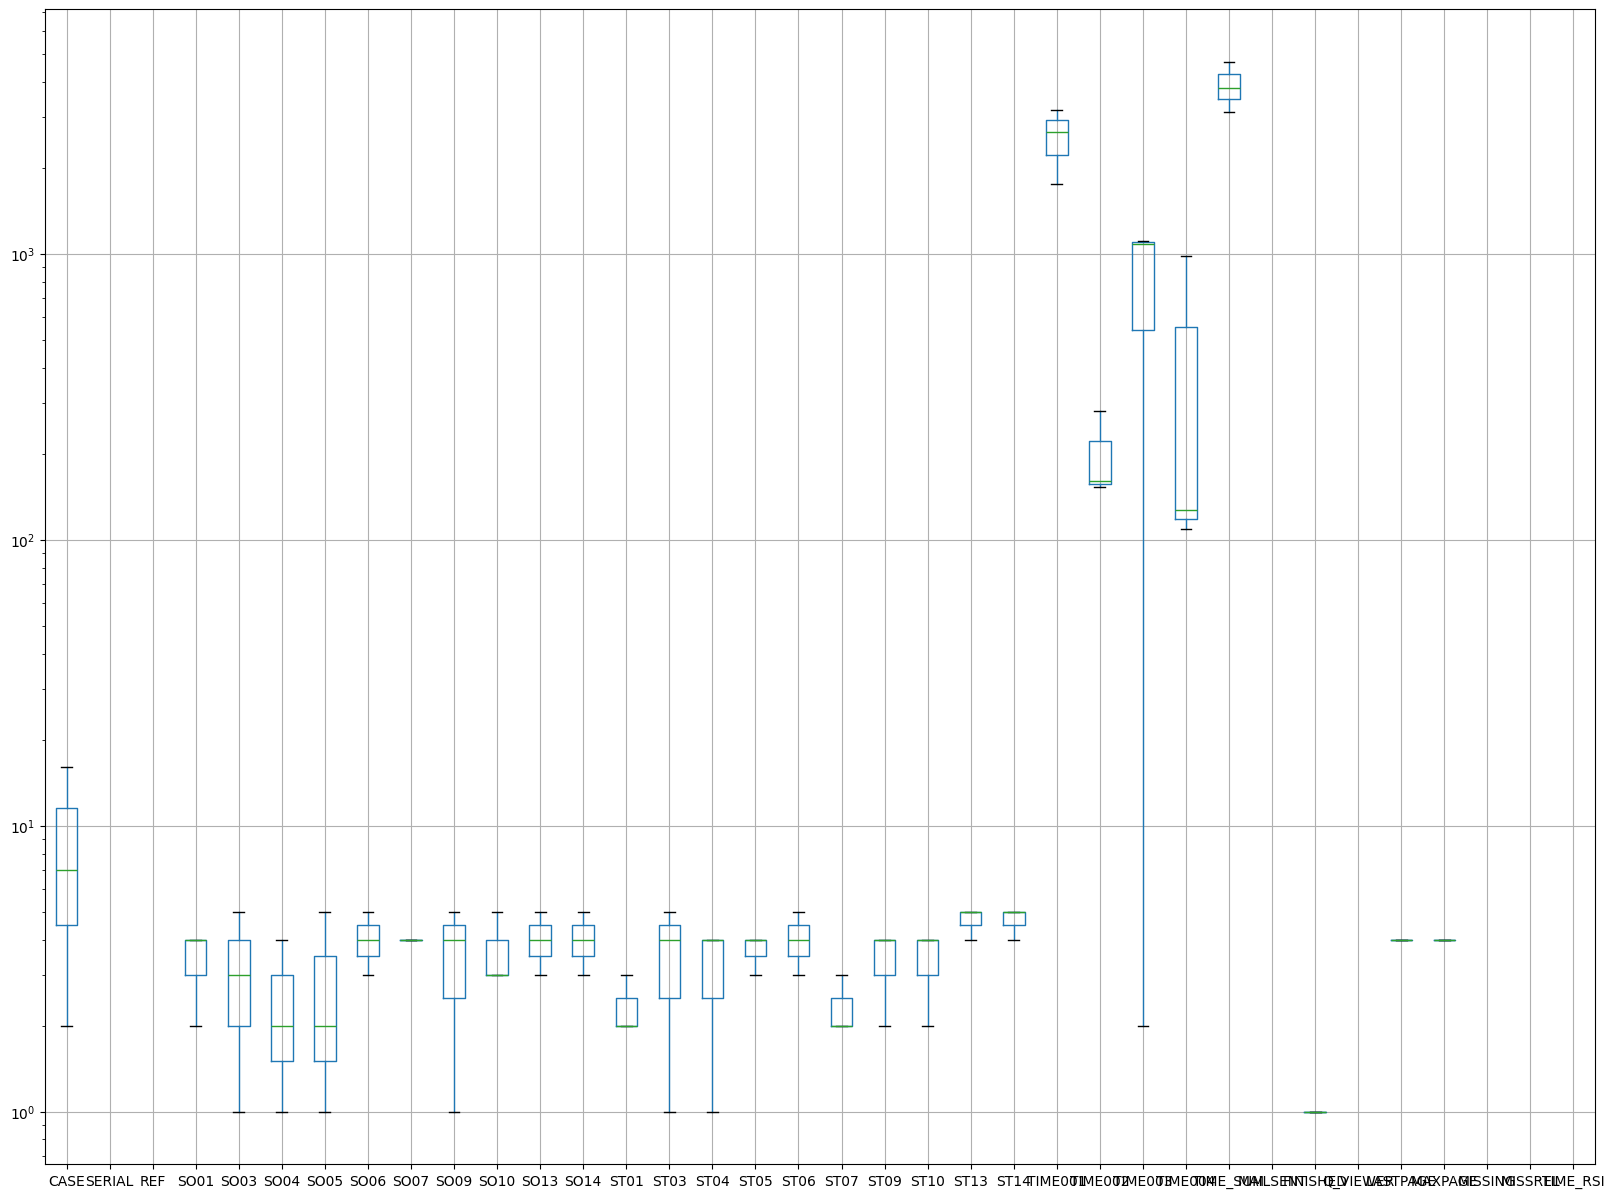

In [6]:
df.boxplot(figsize=(20,15))
plt.semilogy()

In [36]:
# Calculate mean and standard deviation
means = selected_data.mean()
sd = selected_data.std()
print("Var   Mean  Standard Deviation")
for col in selected_data:
    print(f"{col}: {means[col]:.2f} ({sd[col]})")



Var   Mean  Standard Deviation
SO01: 3.33 (1.1547005383792515)
ST01: 2.33 (0.5773502691896258)
SO03: 3.00 (2.0)
ST03: 3.33 (2.081665999466133)
SO04: 2.33 (1.5275252316519465)
ST04: 3.00 (1.7320508075688772)
SO05: 2.67 (2.081665999466133)
ST05: 3.67 (0.5773502691896258)
SO06: 4.00 (1.0)
ST06: 4.00 (1.0)
SO07: 4.00 (0.0)
ST07: 2.33 (0.5773502691896258)
SO09: 3.33 (2.081665999466133)
ST09: 3.33 (1.1547005383792515)
SO10: 3.67 (1.1547005383792515)
ST10: 3.33 (1.1547005383792515)
SO13: 4.00 (1.0)
ST13: 4.67 (0.5773502691896258)
SO14: 4.00 (1.0)
ST14: 4.67 (0.5773502691896258)


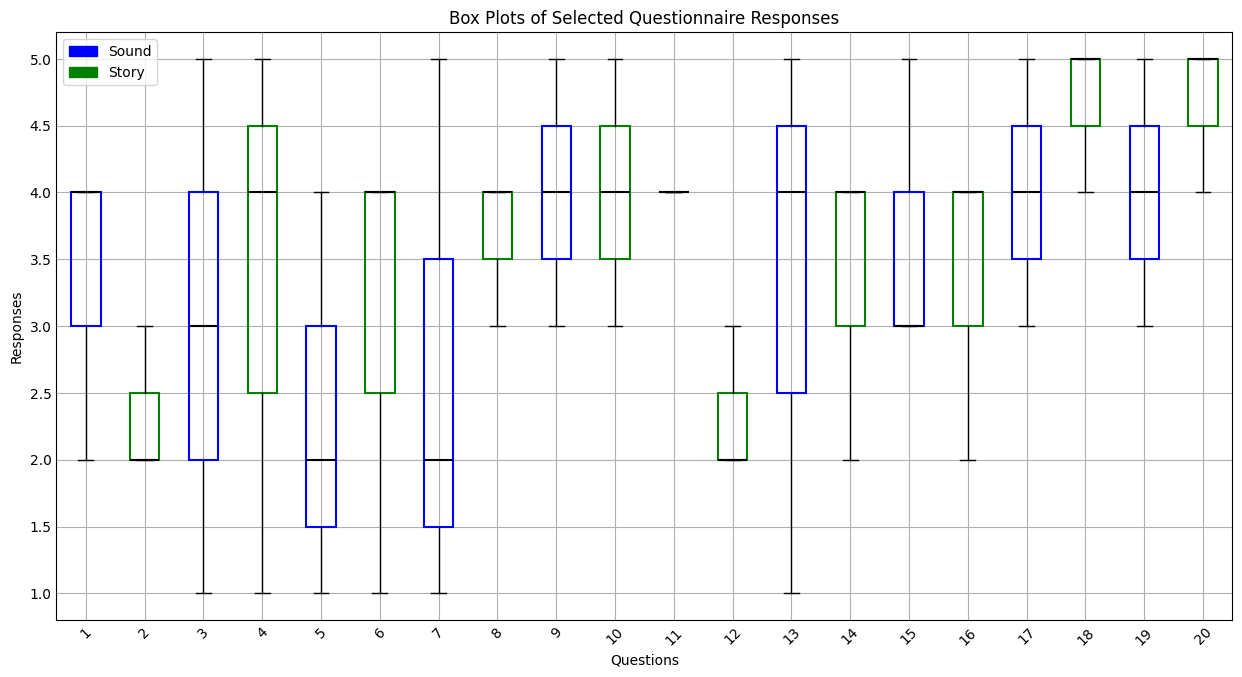

In [92]:
x=["SO01", "ST01", "SO03", "ST03", "SO04", "ST04", "SO05", "ST05", "SO06", "ST06", "SO07", "ST07", "SO09", "ST09", "SO10", "ST10", "SO13", "ST13", "SO14", "ST14"]
selected_data = df[x]

# Create a box plot for the selected columns
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(selected_data,patch_artist=True)
plt.title('Box Plots of Selected Questionnaire Responses')
plt.xlabel('Questions')
plt.ylabel('Responses')
plt.xticks(rotation=45)

# fill with colors
colors = ['blue','green']
for i, box in enumerate(bp['boxes']):
    box.set_edgecolor(colors[i % 2])
    box.set_linewidth(1.5)
    box.set_facecolor('none')
for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

# create legend
so_legend = mpatches.Patch(color=colors[0], label='Sound')
st_legend = mpatches.Patch(color=colors[1], label='Story')

plt.legend(handles=[so_legend, st_legend])

#show plot
plt.show()

[ 0  2  4  6  8 10 12 14 16 18]


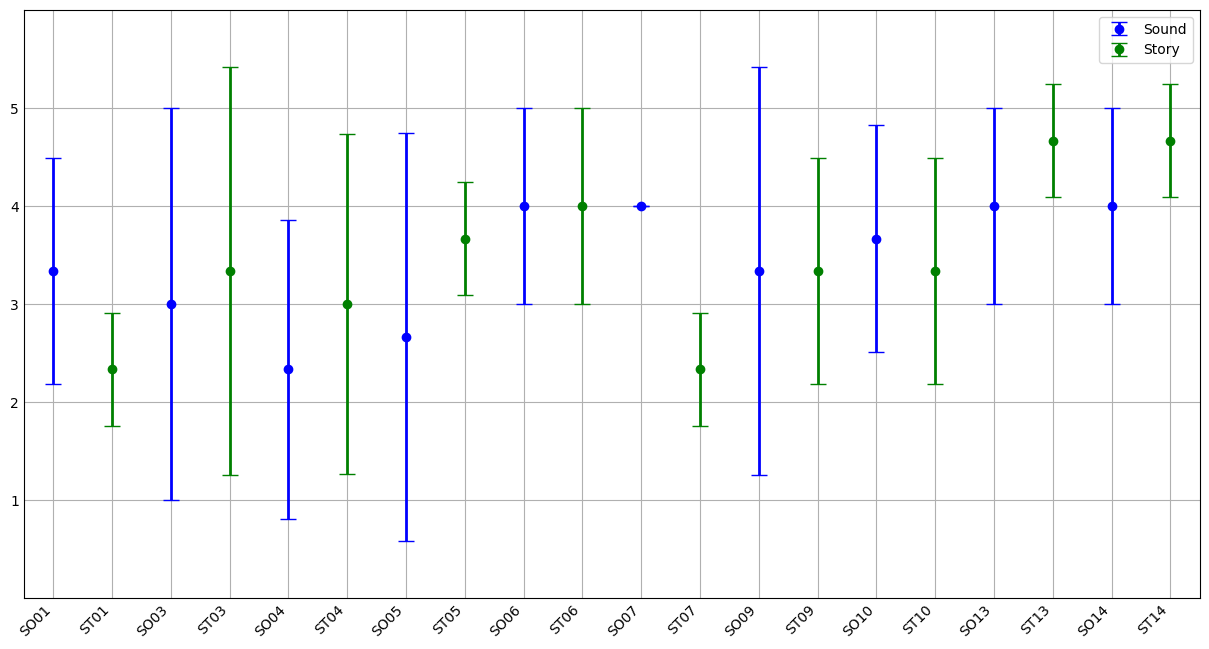

In [93]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Determine indices for SO and ST
so_indices = np.arange(0, len(means), 2)  # Indices for SO (0, 2, 4, ...)
st_indices = np.arange(1, len(means), 2)  # Indices for ST (1, 3, 5, ...)
print(so_indices)
x_indices = np.arange(len(x))

# Plot SO data with blue error bars
ax.errorbar(x_indices[so_indices], means[so_indices], yerr=sd[so_indices], fmt='o', color='blue', linewidth=2, capsize=6, label='Sound')

# Plot ST data with green error bars
ax.errorbar(x_indices[st_indices], means[st_indices], yerr=sd[st_indices], fmt='o', color='green', linewidth=2, capsize=6, label='Story')

# Set axis limits and ticks
ax.set(xlim=(-0.5, len(means) - 0.5), xticks=np.arange(len(means)),
       ylim=(0, 6), yticks=np.arange(1, 6))

# Set x-axis labels
ax.set_xticklabels(x, rotation=45, ha='right')


# Add legend
ax.legend()

# Show plot
plt.show()